In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from nltk.stem import LancasterStemmer

IMPORTING DATASET


In [2]:

train= pd.read_csv("/home/deepansh/TDS-AVENUE-CODEFORGE/Genre Classification Dataset/train_data.txt", sep=":::", names= ["Title", "Genre", "Description"], engine= "python")
test= pd.read_csv("/home/deepansh/TDS-AVENUE-CODEFORGE/Genre Classification Dataset/test_data.txt", sep=":::", names=["Id", "Title", "Description"], engine="python")
test_sol= pd.read_csv("/home/deepansh/TDS-AVENUE-CODEFORGE/Genre Classification Dataset/test_data_solution.txt", sep=":::", names=["Id", "Title","Genre", "Description"], engine="python")

EDA

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (54214, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  2
    Number of

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Title,object,0.000000,100,,,No issue
Genre,object,0.000000,0,,,12 rare categories: Too many to list. Group them into a single category or drop the categories.
Description,object,0.000000,99,,,No issue


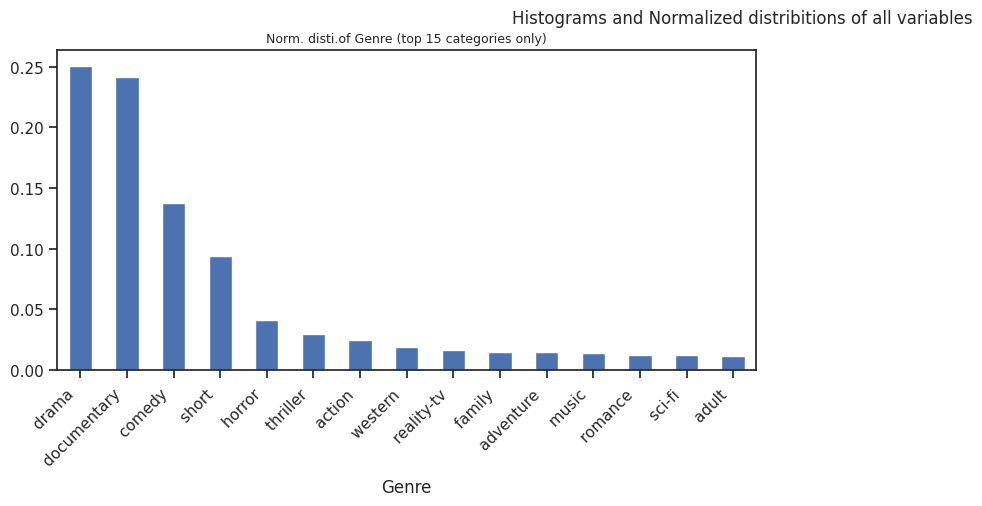

No categorical or boolean vars in data set. Hence no pivot plots...


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/deepansh/nltk_data...
[nltk_data]    |   Package movie_reviews is a

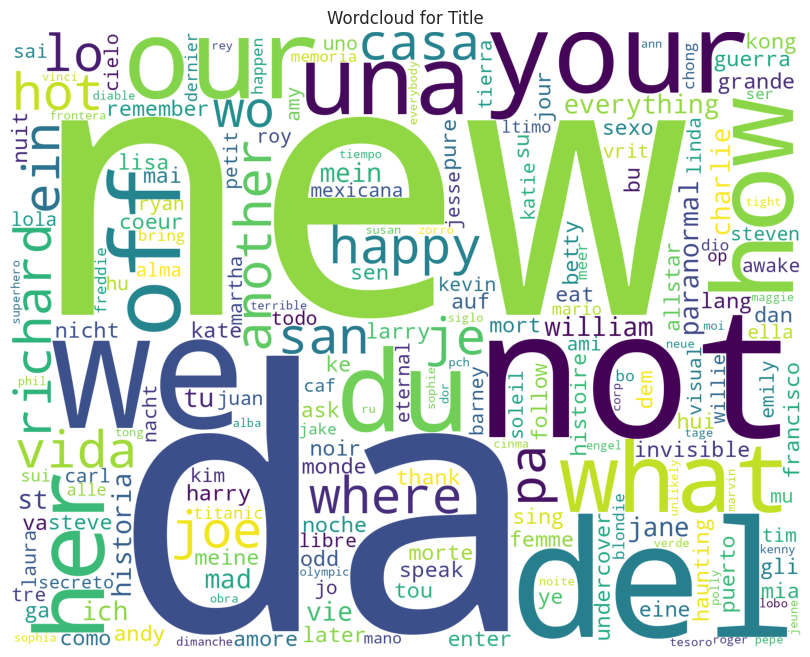

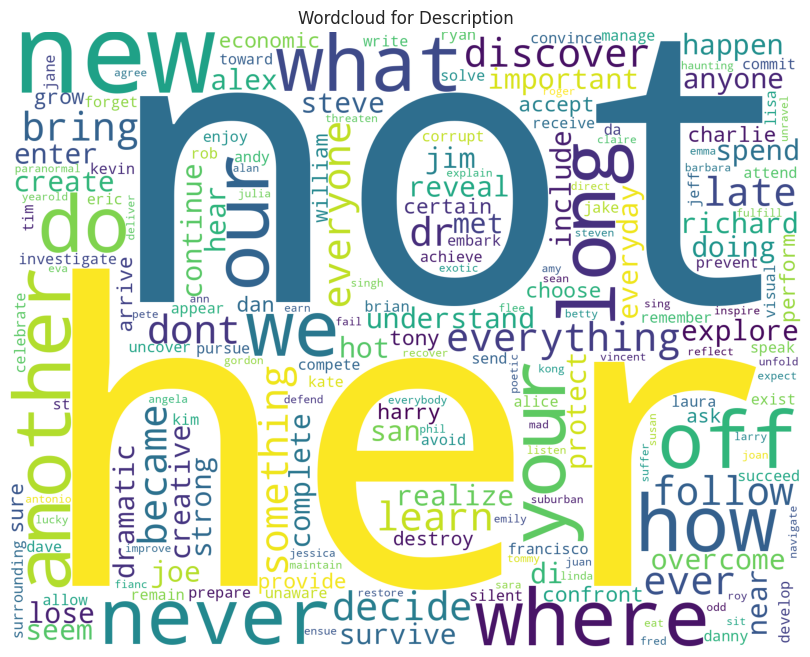

All Plots done
Time to run AutoViz = 68 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [3]:
from autoviz.AutoViz_Class import AutoViz_Class
av= AutoViz_Class()
import matplotlib.pyplot as plt
%matplotlib inline

filename= train
dft= av.AutoViz(
    filename

)



DATA CLEANING

In [4]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [6]:
train.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,"Grammy - music award of the American academy of the audio recording, was founded by the American association of sound-recording companies of March, 14, 1958. Grammy is awarded annually as a result of voting by the authorized members of ""Recording Academy""."
freq,1,13613,12


In [7]:
test.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of ""prince"" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civil war that won the despot Don Pablo is simply for their children ""Dad's war""."
2,3,Off the Beaten Track (2010),"One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products."
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man."
4,5,Er nu zhai (1955),"Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car accident. The couple decides to adopt a baby girl, not knowing that she's the daughter given up by Ming's poor co-worker who struggles to feed a bunch of kids. Bruce Lee plays the slacker son of the landlord (Ko Lo Chuen)."


In [8]:
stemmer = LancasterStemmer()
from nltk.corpus import stopwords
stop_words= set(stopwords.words("english"))

In [9]:
import re
import nltk
import string
def clean_text(text):
    text= text.lower()
    text=re.sub("-", " ", text)
    text= re.sub(f'[{string.digits}]', " ", text)
    text= " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    
    
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text, language = 'english', preserve_line = True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text = re.sub("\s[\s]+", ' ', text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    

In [10]:
inputtext="His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man"
clean =clean_text(inputtext)
print(len(inputtext))
len(clean)

679


356

In [11]:
train["New_description"]= train["Description"].apply(clean_text)
test["New_description"]= test["Description"].apply(clean_text)

In [12]:
train.head(1)

,Title,Genre,Description,New_description
1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",list convers doct parents year old osc learn nobody cour tel week live furious refus speak anyon exceiv straight talk rose lady pink meet hospit stairs christmas approaches ros fantast expery profess wrestler imagination wit charm allow osc liv lif lov full company friend pop corn einstein bacon child sweetheart peggy blue


In [13]:
train["len_clean_text"]= train["New_description"].apply(len)

In [14]:
train.head()


,Title,Genre,Description,New_description,len_clean_text
1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",list convers doct parents year old osc learn nobody cour tel week live furious refus speak anyon exceiv straight talk rose lady pink meet hospit stairs christmas approaches ros fantast expery profess wrestler imagination wit charm allow osc liv lif lov full company friend pop corn einstein bacon child sweetheart peggy blue,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.,broth sist past incestu rel cur murd relationship murd wom reject murd wom get clos,83
3,"Young, Wild and Wonderful (1980)",adult,"As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little ""acquisition. "" Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the bus departs, everyone admits it was quite an education.",bus empty stud field trip muse nat history littl tour guid suspect stud anoth tour first lect films coed drift dream erot fantasy imagine films releas emot fantasy erot uncommon ways slip curators littl acquisition anoth find anthropolog see bon identified head teach immune soon tour bus departs everyon admit quit education,325
4,The Secret Sin (1915),drama,"To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their father strikes oil, the family enjoys a new prosperity and the sisters meet the eligible Jack Herron, a fellow oil prospector. To Grace's shock, Jack falls in love with Edith and in her jealousy, Grace tells Jack that Edith, not she, has a drug problem. Hinting that her sister will soon need more morphine, Grace arranges for a dinner in Chinatown with the couple. While her sister and Jack dance, Grace slips away to an opium den. Edith follows her, but ends up in the wrong den and is arrested in an ensuing drug raid. After he bails her out of jail, Edith takes an angry Jack to search for Grace and stumbles across her half-conscious body lying in the street. The truth about the sisters is revealed, and after sending Grace to a sanitarium in the country, Jack and Edith are married.",help unemploy fath mak end meet edi twin sist grac work seamstress invalid grac fal prey tempt chinatown becom addict condit wors misguid phys prescrib morphin eas pain fath strikes oil famy enjoy new prosp sist meet elig jack herron fellow oil prospector graces shock jack fal lov edi jealousy grac tel jack edith drug problem hint sist soon nee morphine grac arrang din chinatown couple sist jack dance grac slip away den edi follow end wrong den arrest ensu drug raid bail jail edi tak angry jack search grac stumbl across half conscy body lying street tru sist revealed send grac sanitar co

In [15]:

(train["len_clean_text"]>2000).value_counts()

len_clean_text
False    54131
True        83
Name: count, dtype: int64

In [16]:
print("length of datset before removing:",len(train))
index_drop=train["len_clean_text"]>2000
train.drop(train[index_drop].index, axis=0, inplace=True)


length of datset before removing: 54214


In [17]:
print("length after removal:",len(train))

length after removal: 54131


In [18]:
train.head(1)

,Title,Genre,Description,New_description,len_clean_text
1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",list convers doct parents year old osc learn nobody cour tel week live furious refus speak anyon exceiv straight talk rose lady pink meet hospit stairs christmas approaches ros fantast expery profess wrestler imagination wit charm allow osc liv lif lov full company friend pop corn einstein bacon child sweetheart peggy blue,324


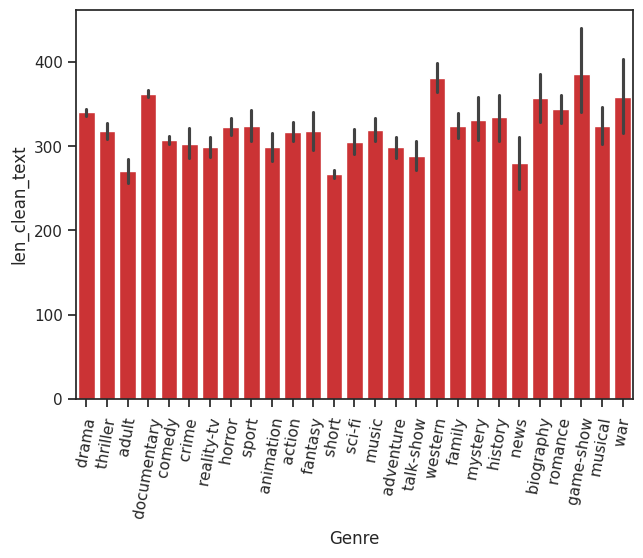

In [19]:
from seaborn import barplot as bp
bp(x= "Genre", y="len_clean_text", data=train)
plt.xticks(rotation=80)
plt.show()

Split Data

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
Y_train= label_encoder.fit_transform(train["Genre"])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline= Pipeline(
    [("tfidf", TfidfVectorizer(max_df=0.9, ngram_range=(1,2))),
     ("model",SVC(kernel= "linear", C=1) )]
)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=  train_test_split(train["New_description"],Y_train, test_size=0.3 , random_state=49)

Model Training

In [23]:
pipeline.fit(x_train,y_train )

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('model', SVC(C=1, kernel='linear'))])

Evalution of Model


In [24]:
y_train_pred = pipeline.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.956269298778074


In [25]:
y_test_pred = pipeline.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {test_accuracy}")

Validation Accuracy: 0.5855911330049262


In [26]:
test_descriptions = test['New_description']
test_predictions = pipeline.predict(test_descriptions)
test_predictions_labels = label_encoder.inverse_transform(test_predictions)


In [27]:
test['Predicted_Genre'] = test_predictions_labels
# Compare predictions with the actual genres from the solution
test_sol = test_sol[['Id', 'Genre']]
test = test[['Id', 'Predicted_Genre']]
comparison_df = test.merge(test_sol, on='Id')
comparison_df.columns = ['Id', 'Predicted_Genre', 'Actual_Genre']

# Calculate accuracy
accuracy = accuracy_score(comparison_df['Actual_Genre'], comparison_df['Predicted_Genre'])
print(f"Test Data Accuracy: {accuracy}")

Test Data Accuracy: 0.5813468634686347
